In [1]:
import numpy as np
import phoebe
import matplotlib.pyplot as plt
%matplotlib inline

/Users/khambl02/.venvs/edit_ph_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Set the mode to component-coupled for the luminosity. Use compute phases and compute the light curve.

In [2]:
b = phoebe.load('bundles/after_nm_phys.bundle')
#print(b)

Plot the model from the previous run

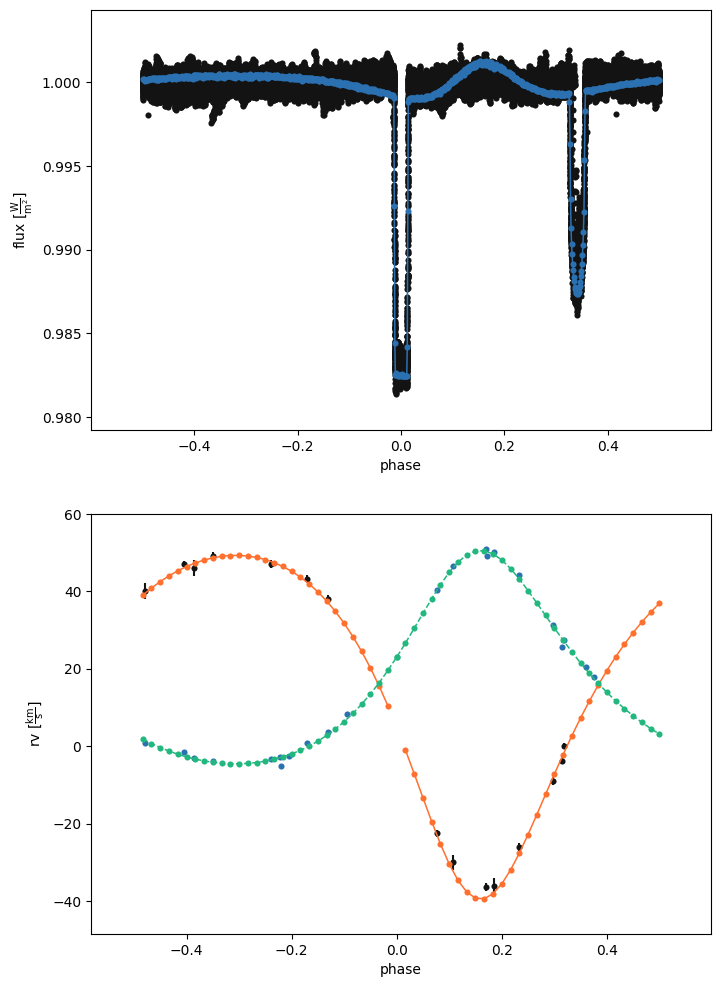

(<autofig.figure.Figure | 2 axes | 6 call(s)>,
 <Figure size 800x1200 with 2 Axes>)

In [9]:
b.plot(x='phase', show=True,  model="nm_phys_mod4", marker="o",s=0.005)

Add a set of compute options called "fastcompute" that computes the model as quickly as possible. This excludes all of the necessary physics but is ok for computing light levels.

In [10]:
b.add_compute(compute='fastcompute',overwrite=True)
phase_no = 400
b.set_value_all('compute_phases', np.linspace(-0.5,0.5,phase_no))
b.set_value_all('ld_mode', 'lookup')
b.set_value_all('pblum_mode', 'component-coupled')
b.set_value_all('distortion_method', 'sphere', compute='fastcompute')
b.set_value('irrad_method', compute='fastcompute', value='none')
b.set_value_all('rv_method', compute='fastcompute', value='dynamical')

b.run_compute(compute='fastcompute',model='fast',overwrite=True)

100%|██████████| 400/400 [00:06<00:00, 66.45it/s]


<ParameterSet: 7 parameters | kinds: rv, lc>

In [11]:
print(b['pblum_mode@lc01@dataset'])

Parameter: pblum_mode@lc01@dataset
                       Qualifier: pblum_mode
                     Description: Mode for scaling passband luminosities
                           Value: component-coupled
                         Choices: decoupled, component-coupled, dataset-coupled, dataset-scaled, absolute
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [12]:
print(b.compute_pblums(compute='fastcompute'))

{'pblum@primary@lc01': <Quantity 12.56637061 W>, 'pblum@secondary@lc01': <Quantity 747.39710552 W>}


In [13]:
b.set_value('pblum_component', 'secondary')

In [14]:
print(b.filter(qualifier='pblum'))

ParameterSet: 1 parameters
     pblum@secondary@lc01@dataset: 12.566370614359172 W


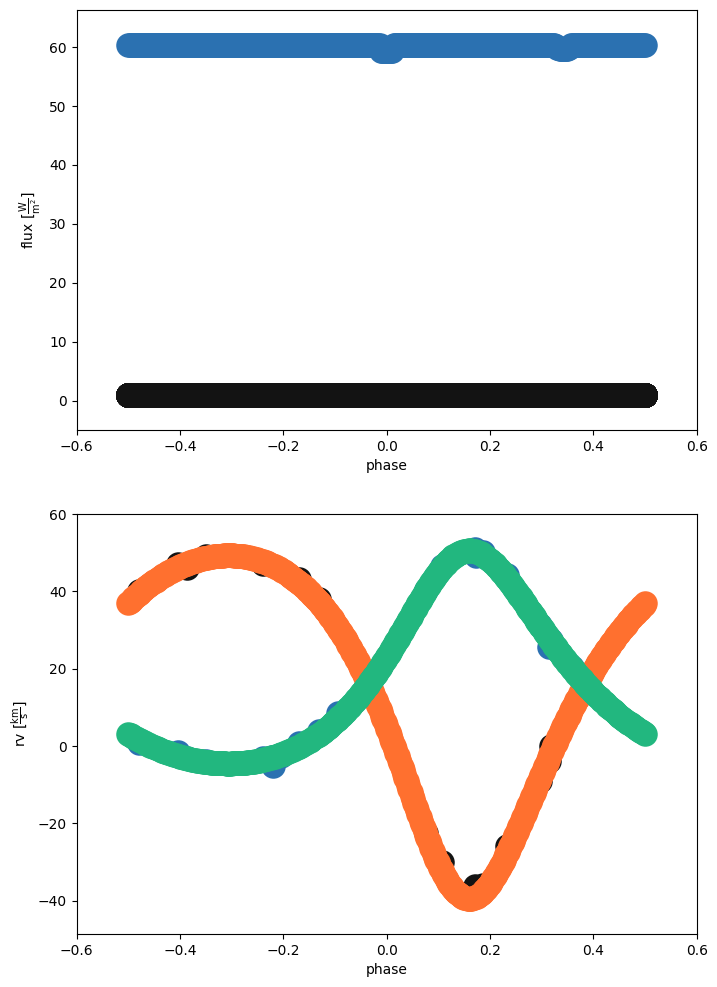

(<autofig.figure.Figure | 2 axes | 6 call(s)>,
 <Figure size 800x1200 with 2 Axes>)

In [ ]:
b.plot(x='phase', show=True, model='fast',s=0.005, ls='-',marker='o')

You can see that the model of the light curve is offset from the actual light curve in the y-direction. This is the passband luminosity. We can compute the passband luminosity using the nelder mead optimizer. 

In [16]:
b.enable_dataset('lc01')
b.disable_dataset('rv01')

<ParameterSet: 24 parameters | components: binary, secondary, primary>

Fit using the fast compute options so that we fit the light levels quickly.

In [17]:
b.add_solver('optimizer.nelder_mead', fit_parameters='pblum@secondary', solver='opt_pblum',overwrite=True)
b.set_value('maxiter', solver='opt_pblum', value=10)
b.run_solver(compute='fastcompute',solver='opt_pblum', solution='opt_pblum_sol',overwrite=True)
b.adopt_solution('opt_pblum_sol')

 40%|████      | 4/10 [00:43<01:05, 10.87s/it]

With the solution, run the model and plot it with all the physics included.

In [ ]:
b.run_compute(compute='comp_phys', solution='opt_pblum_sol',model='pblum_mod',overwrite=True)

Plot the model to ensure the vertical offset (light levels) has been adjusted correctly.

In [ ]:
b.plot(x='phase', show=True, model='pblum_mod', xlim=(-0.5,0.5))

In [ ]:
b.save('bundles/lum_adjusted.bundle')